In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from sklearn import cluster, datasets #for k-means


# go to file directory

In [2]:
#%cd desktop

[WinError 2] 系統找不到指定的檔案。: 'desktop'
G:\我的雲端硬碟\大數據分析實務\HW2


In [27]:
df = pd.read_csv("not_over_user_payment.csv")
df.head()

,UID,payment_date,amount,YEAR,MONTH,DAY
0,3753824,2018-09-21 07:54:38,450,2018,9,21
1,3884784,2017-02-13 05:48:00,1000,2017,2,13
2,3884784,2017-11-15 12:23:36,1000,2017,11,15
3,3884784,2017-12-13 11:47:55,50,2017,12,13
4,3884784,2017-12-13 11:53:03,50,2017,12,13


In [34]:
#df[df['amount']>1000].head(20)
df = df[df['amount']<1000]
df = df[df['amount']>25]
df.amount.replace(30, 25,inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12281 entries, 0 to 31695
Data columns (total 6 columns):
UID             12281 non-null int64
payment_date    12281 non-null object
amount          12281 non-null int64
YEAR            12281 non-null int64
MONTH           12281 non-null int64
DAY             12281 non-null int64
dtypes: int64(5), object(1)
memory usage: 671.6+ KB


In [35]:
df.amount.describe()
#df.amount.head(100)

count    12281.000000
mean       319.277339
std        177.425298
min         25.000000
25%        150.000000
50%        300.000000
75%        500.000000
max        900.000000
Name: amount, dtype: float64

In [59]:
df['payment_date'] = pd.to_datetime(df['payment_date'])

In [57]:
for i in range(len(df.payment_date)):
    df.payment_date.iloc[i] = df.payment_date.iloc[i]+dt.timedelta(days=+426)

C:\Users\una18\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
df.payment_date.describe()

count                   12281
unique                  12087
top       2019-05-09 00:26:07
freq                        2
first     2018-03-03 08:44:49
last      2019-11-30 19:31:35
Name: payment_date, dtype: object

In [60]:
df.to_csv('user_payment.csv')

In [8]:
df.columns = ["UID", "trans_date","tran_amount","YEAR","MONTH","DAY"] #改成英文
df['trans_date'] = pd.to_datetime(df['trans_date']) #object to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31696 entries, 0 to 31695
Data columns (total 6 columns):
UID            31696 non-null int64
trans_date     31696 non-null datetime64[ns]
tran_amount    31696 non-null int64
YEAR           31696 non-null int64
MONTH          31696 non-null int64
DAY            31696 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.5 MB


In [9]:
print(df['trans_date'].min(), df['trans_date'].max())

2017-01-01 08:04:26 2018-09-30 23:12:45


In [10]:
sd = dt.datetime(2018,11,22)
df['hist']=sd - df['trans_date']
df['hist'].astype('timedelta64[D]')
df['hist']=(df['hist'] / np.timedelta64(1, 'D'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31696 entries, 0 to 31695
Data columns (total 7 columns):
UID            31696 non-null int64
trans_date     31696 non-null datetime64[ns]
tran_amount    31696 non-null int64
YEAR           31696 non-null int64
MONTH          31696 non-null int64
DAY            31696 non-null int64
hist           31696 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.7 MB


In [11]:
rfmTable = df.groupby('UID').agg({'hist': lambda x:x.min(),                   # Recency
                                  'UID': lambda x: len(x),            # Frequency
                                  'tran_amount': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'hist': 'recency', 
                         'UID': 'frequency', 
                         'tran_amount': 'monetary_value'}, inplace=True)

In [13]:
rfmTable.head()

,recency,frequency,monetary_value
UID,,,
1341104,108.877627,28,12950
1361552,75.383009,3,1015
1368368,94.882743,116,249300
1369904,100.724826,60,104260
1374736,66.150521,18,20300


In [14]:
rfmTable.describe()

,recency,frequency,monetary_value
count,1263.000000,1263.000000,1.263000e+03
mean,80.988329,25.095804,4.147412e+04
std,18.577013,39.869870,1.303419e+05
min,52.032812,1.000000,5.000000e+01
25%,65.655683,5.000000,2.150000e+03
50%,76.671308,12.000000,7.900000e+03
75%,98.713889,30.000000,3.239500e+04
max,112.808900,704.000000,2.623250e+06


In [15]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

        recency  frequency  monetary_value
0.25  65.655683        5.0          2150.0
0.50  76.671308       12.0          7900.0
0.75  98.713889       30.0         32395.0 <class 'pandas.core.frame.DataFrame'>


In [16]:
## for Recency 
def RClass(x,p,d):
    if x <= d[p][0.5]:
        return 0
    else:
        return 1
    
## for Frequency and Monetary value 
def FMClass(x,p,d):
    if x <= d[p][0.5]:
        return 1
    else:
        return 0   

In [17]:
rfmSeg = rfmTable
rfmSeg['R_Mean'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Mean'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Mean'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [18]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Mean,F_Mean,M_Mean
UID,,,,,,
1341104,108.877627,28,12950,1,0,0
1361552,75.383009,3,1015,0,1,1
1368368,94.882743,116,249300,1,0,0
1369904,100.724826,60,104260,1,0,0
1374736,66.150521,18,20300,0,0,0


In [19]:
def playerClassify(a,b):
    val = a
    if val == "111":
        rank = 1
    elif val == "110":
        rank = 2
    elif val == "101":
        rank = 3
    elif val == "011":
        rank = 4    
    elif val == "100":
        rank = 5    
    elif val == "010":
        rank = 6    
    elif val == "001":
        rank = 7    
    else:
        rank = 8 
    return rank
        
rfmPlayerSegment = rfmSeg    
rfmPlayerSegment['Score'] = rfmPlayerSegment.R_Mean.map(str) \
                            + rfmSeg.F_Mean.map(str) \
                            + rfmSeg.M_Mean.map(str)


In [20]:
rfmPlayerSegment['Rank'] = rfmPlayerSegment['Score'].apply(playerClassify, args=('Score',))
rfmPlayerSegment.head()

,recency,frequency,monetary_value,R_Mean,F_Mean,M_Mean,Score,Rank
UID,,,,,,,,
1341104,108.877627,28,12950,1,0,0,100,5
1361552,75.383009,3,1015,0,1,1,011,4
1368368,94.882743,116,249300,1,0,0,100,5
1369904,100.724826,60,104260,1,0,0,100,5
1374736,66.150521,18,20300,0,0,0,000,8


In [22]:
rfmPlayerSegment.to_csv("clean_tables\\rfmPlayerSegment_new.csv")

In [23]:
# 這邊先不理他 還不知道到底要幹嘛用
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(rfmTable)
    wcss.append(kmeans.inertia_)

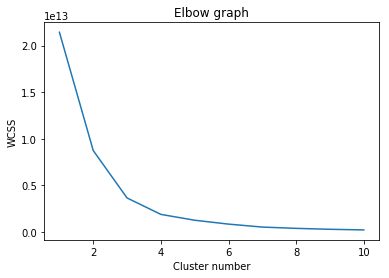

In [24]:
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()   #from the result, we can see thata the optimal number of clusters would be 4

In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(rfmTable)

In [26]:
rfmTable['clusters'] = clusters
rfmTable.head()

,recency,frequency,monetary_value,R_Mean,F_Mean,M_Mean,Score,Rank,clusters
UID,,,,,,,,,
1341104,108.877627,28,12950,1,0,0,100,5,0
1361552,75.383009,3,1015,0,1,1,011,4,0
1368368,94.882743,116,249300,1,0,0,100,5,3
1369904,100.724826,60,104260,1,0,0,100,5,3
1374736,66.150521,18,20300,0,0,0,000,8,0


Text(0.5,0,'Monetary')

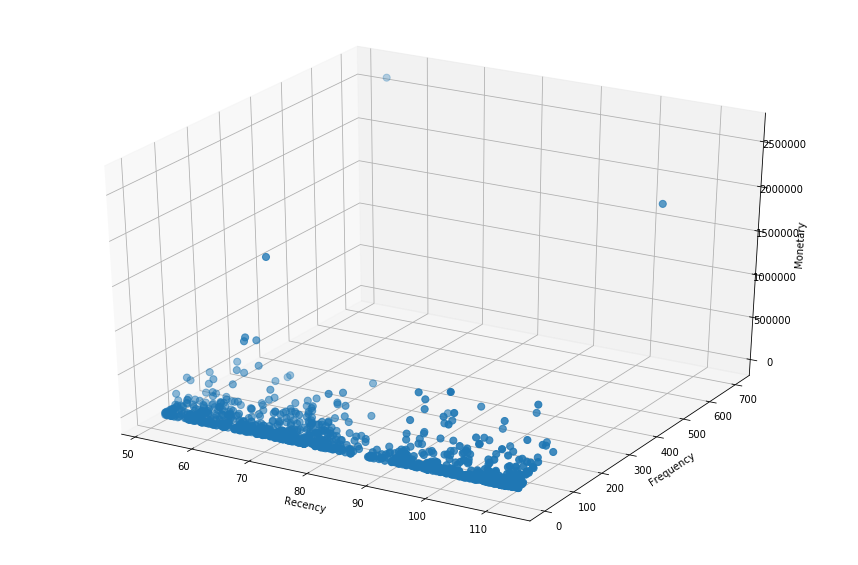

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfmTable.recency, rfmTable.frequency, rfmTable.monetary_value, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')